In [29]:
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
#%matplotlib inline
%matplotlib ipympl
def aperture(x, y):
    return (np.abs(x) <= 0.05)*1

λ=0.002 # 0.015
D = 10 # distance between aperture and screen
k = np.pi*2/λ
xa, ya = np.linspace(-0.5, 0.5, 101), np.linspace(-0.5, 0.5, 101) #coordinates of aperture
Xa, Ya = np.meshgrid(xa, ya, indexing='ij')

A_xy = aperture(Xa, Ya)

xs, ys = np.linspace(-0.5, 0.5, 101), np.linspace(-0.5, 0.5, 101) #coordinates of screen
Xs, Ys = np.meshgrid(xs, ys, indexing='ij')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
# far field approximation
tmp = np.trapz(A_xy * , Xa, axis=0) # ny
E = np.trapz(tmp, Ya[0], axis=0)

SyntaxError: invalid syntax (2279181276.py, line 2)

In [31]:
# full simulation (O(N^4))
r = np.sqrt(D**2+ (Xs[..., None, None] - Xa)**2 + (Ys[..., None, None] - Ya)**2) # Nxs, Nys, Nxa, Nya

In [32]:
tmp = np.trapz(A_xy * np.exp(-1.0j*k*r)*(r**-1 + D*r**-2), Ya[None, None, :], axis=3) # Nxs, Nys, Nxa
E = np.trapz(tmp, Xa[None, None, :, 0], axis=2) # Nxs, Nys
print(E)

[[-7.24559033e-05-1.89089170e-04j -6.12741532e-05-2.15749447e-04j
  -5.00960916e-05-2.41585411e-04j ... -5.00960916e-05-2.41585411e-04j
  -6.12741532e-05-2.15749447e-04j -7.24559033e-05-1.89089170e-04j]
 [ 1.83859939e-04-8.03856702e-05j  2.10758375e-04-7.05372236e-05j
   2.36855138e-04-6.06564966e-05j ...  2.36855138e-04-6.06564966e-05j
   2.10758375e-04-7.05372236e-05j  1.83859939e-04-8.03856702e-05j]
 [ 9.15262483e-05+1.70925360e-04j  8.41019232e-05+1.97584208e-04j
   7.65882737e-05+2.23487237e-04j ...  7.65882737e-05+2.23487237e-04j
   8.41019232e-05+1.97584208e-04j  9.15262483e-05+1.70925360e-04j]
 ...
 [ 1.83859939e-04-8.03856702e-05j  2.10758375e-04-7.05372236e-05j
   2.36855138e-04-6.06564966e-05j ...  2.36855138e-04-6.06564966e-05j
   2.10758375e-04-7.05372236e-05j  1.83859939e-04-8.03856702e-05j]
 [-7.24559033e-05-1.89089170e-04j -6.12741532e-05-2.15749447e-04j
  -5.00960916e-05-2.41585411e-04j ... -5.00960916e-05-2.41585411e-04j
  -6.12741532e-05-2.15749447e-04j -7.24559033e-

In [20]:
print(E.shape)

(101, 101)


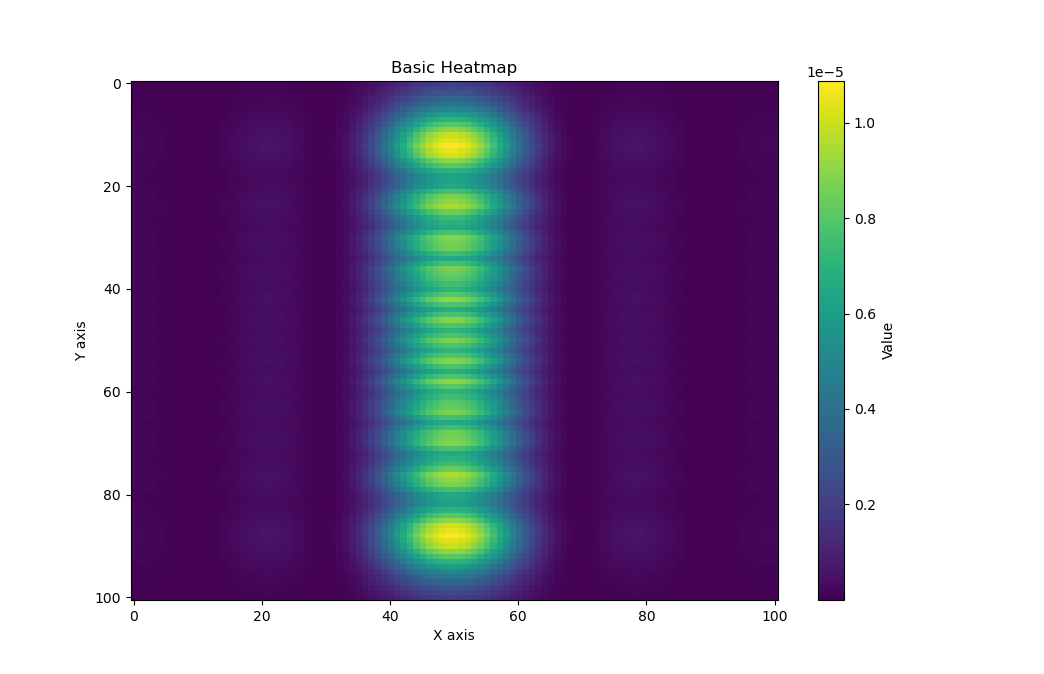

In [33]:
mag_E2 = E.real**2 + E.imag**2

# Generate random data
data = np.random.rand(10, 12)
plt.clf()
# Plot heatmap
plt.imshow(mag_E2.T, cmap='viridis', aspect='auto')
plt.colorbar(label='Value')
plt.title('Basic Heatmap')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()